# Plotting

First, let's train up a simple network to explore. This one is trained to compute XOR:

In [1]:
from conx import Network, Layer, SGD

#net = Network("XOR Network", 2, 4, 1, activation="sigmoid")

net = Network("XOR Network")
net.add(Layer("input", shape=2))
net.add(Layer("hidden", shape=4, activation='sigmoid'))
net.add(Layer("output", shape=1, activation='sigmoid'))
net.connect()

dataset = [
    ([0, 0], [0]),
    ([0, 1], [1]),
    ([1, 0], [1]),
    ([1, 1], [0])
]
net.compile(loss='mean_squared_error', optimizer=SGD(lr=0.3, momentum=0.9))
net.dataset.load(dataset)

conx, version 3.3.4
Using Theano backend.


In [4]:
net.get_weights_as_image("hidden", None).size

(4, 2)

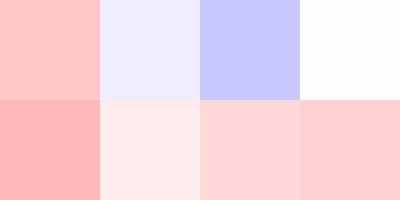

In [5]:
net.get_weights_as_image("hidden", None).resize((400, 200))

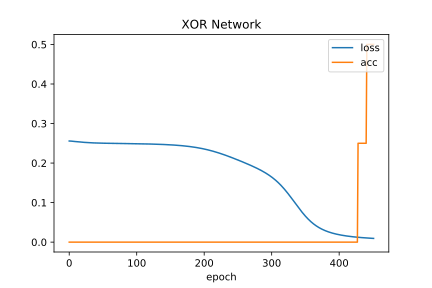

#  457 |   0.00886 |   1.00000 


In [28]:
net.reset(seed=3863479522)
net.train(epochs=2000, accuracy=1, report_rate=25, plot=True)

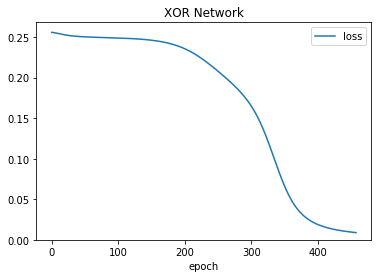

In [29]:
net.plot('loss', ymin=0)

## Propagate to plot

This plotting function allows us to see the activation at a specific unit, given that we vary two inputs.

You must specify which output or hidden layer unit to plot, the name of the input bank, and the two units.

In this example, we explore the output unit given that we vary the two inputs:

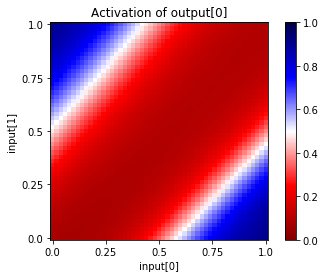

In [30]:
net.propagate_to_plot(output_layer="output", output_index=0, 
                      input_layer="input", input_index1=0, input_index2=1,
                      act_range=(0,1))

We can verify the above output activation map by running different input vectors through the network manually:

In [31]:
input=[1,0];net.propagate(input)[0]

0.9079096913337708

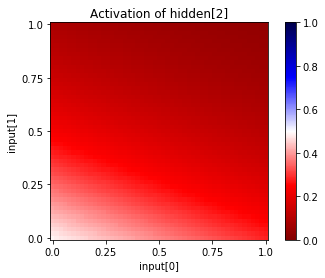

In [32]:
# reasonably fast
# map of hidden[2] activation as a function of inputs
net.propagate_to_plot(output_layer="hidden", output_index=2,
                      input_layer="input", input_index1=0, input_index2=1,
                      act_range=(0,1))

In [33]:
# temporary functions
import numpy as np

def sigmoid(x):
    return 1/(np.exp(-x)+1)

# calculate the net's output unit activation as a function of the
# given hidden vector h, independently of propagate_from.
def output_val(h, net):
    w = net['output'].keras_layer.get_weights()[0].transpose()[0]
    bias = net['output'].keras_layer.get_weights()[1]
    return sigmoid(sum(h*w)+bias)[0]

# print a matrix showing a map of the output unit activation values
# as hidden unit number hx is varied from 0 to 1 on the x-axis and
# hidden unit number hy is varied from 0 to 1 on the y-axis. this
# method calculates the output values directly from the output unit's
# weights and bias values, independently of propagate_from.
def show_hidden_to_output_map(net, hx=0, hy=1, res=20):
    s = ''
    for y in np.linspace(1, 0, res):
        for x in np.linspace(0, 1, res):
            h = [0,0,0,0]
            h[hx] = x
            h[hy] = y
            out = output_val(h, net)
            s += '%.2f ' % out
        s += '\n'
    print(s)

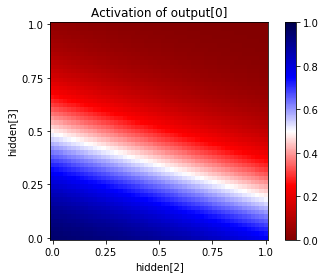

In [34]:
# glacially slow
# map of output activation as a function of hidden units 2,3
net.propagate_to_plot(output_layer='output', output_index=0,
                      input_layer='hidden', input_index1=2, input_index2=3,
                      act_range=(0,1))

In [35]:
# verify that the above map is correct
show_hidden_to_output_map(net, 2, 3)


0.04 0.04 0.04 0.03 0.03 0.03 0.02 0.02 0.02 0.02 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 
0.06 0.05 0.05 0.04 0.04 0.04 0.03 0.03 0.03 0.02 0.02 0.02 0.02 0.02 0.02 0.01 0.01 0.01 0.01 0.01 
0.08 0.07 0.07 0.06 0.05 0.05 0.05 0.04 0.04 0.03 0.03 0.03 0.03 0.02 0.02 0.02 0.02 0.02 0.01 0.01 
0.10 0.10 0.09 0.08 0.07 0.07 0.06 0.06 0.05 0.05 0.04 0.04 0.04 0.03 0.03 0.03 0.02 0.02 0.02 0.02 
0.14 0.13 0.12 0.11 0.10 0.09 0.08 0.08 0.07 0.06 0.06 0.05 0.05 0.04 0.04 0.04 0.03 0.03 0.03 0.02 
0.18 0.17 0.15 0.14 0.13 0.12 0.11 0.10 0.09 0.08 0.08 0.07 0.06 0.06 0.05 0.05 0.04 0.04 0.04 0.03 
0.23 0.22 0.20 0.19 0.17 0.16 0.15 0.13 0.12 0.11 0.10 0.09 0.09 0.08 0.07 0.07 0.06 0.06 0.05 0.05 
0.30 0.28 0.26 0.24 0.22 0.21 0.19 0.18 0.16 0.15 0.14 0.13 0.12 0.11 0.10 0.09 0.08 0.07 0.07 0.06 
0.37 0.35 0.32 0.30 0.28 0.26 0.25 0.23 0.21 0.20 0.18 0.17 0.15 0.14 0.13 0.12 0.11 0.10 0.09 0.08 
0.45 0.42 0.40 0.37 0.35 0.33 0.31 0.29 0.27 0.25 0.23 0.22 0.20 0.18 0.17 0.16 0.14 0.13 0

How does the network actually solve the problem? We can look at the intermediary values at the hidden layer by plotting each of the 4 hidden units in this manner:

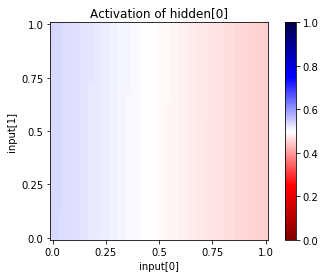

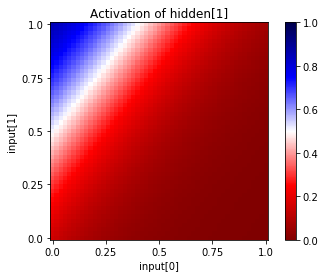

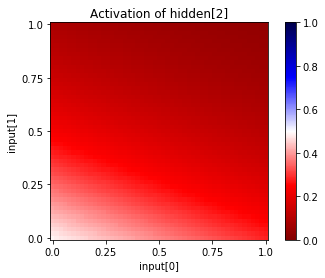

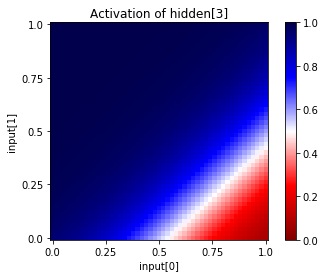

In [36]:
for i in range(4):
    net.propagate_to_plot(output_layer="hidden", output_index=i, 
                          input_layer="input", input_index1=0, input_index2=1,
                          act_range=(0,1))

## Adding Additional Hidden Layers

In [37]:
from conx import Network, Layer, SGD

#net = Network("XOR Network", 2, 4, 2, 1, activation="sigmoid")

net = Network("XOR Network")
net.add(Layer("input", shape=2))
net.add(Layer("hidden", shape=4, activation='sigmoid'))
net.add(Layer("hidden2", shape=2, activation='sigmoid'))
net.add(Layer("output", shape=1, activation='sigmoid'))
net.connect()

dataset = [
    ([0, 0], [0]),
    ([0, 1], [1]),
    ([1, 0], [1]),
    ([1, 1], [0])
]
net.compile(loss='mean_squared_error', optimizer=SGD(lr=0.3, momentum=0.9))
net.dataset.load(dataset)

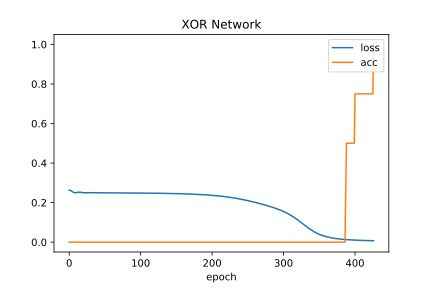

#  426 |   0.00691 |   1.00000 


In [38]:
net.reset(seed=3863479522)
net.train(epochs=2000, accuracy=1, report_rate=25, plot=True)

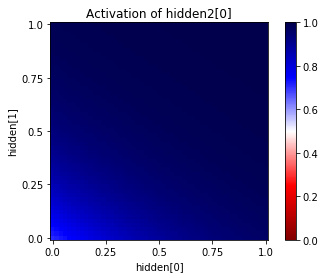

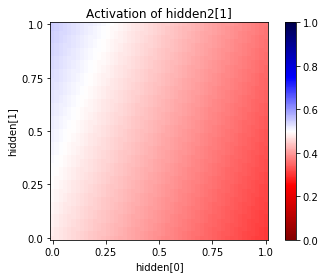

In [39]:
for i in range(2):
    net.propagate_to_plot(output_layer="hidden2", output_index=i, 
                          input_layer="hidden", input_index1=0, input_index2=1,
                          act_range=(0,1))

## Plotting training error (loss) and training accuracy (acc)

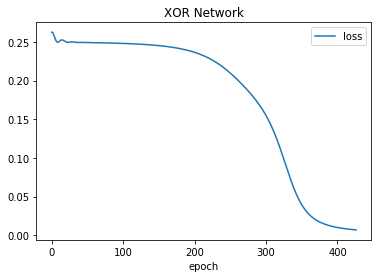

In [40]:
net.plot("loss")

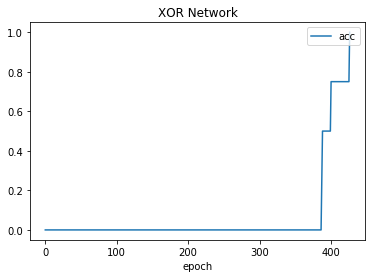

In [41]:
net.plot("acc")

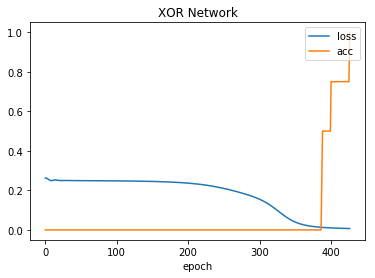

In [42]:
net.plot(["loss", "acc"])

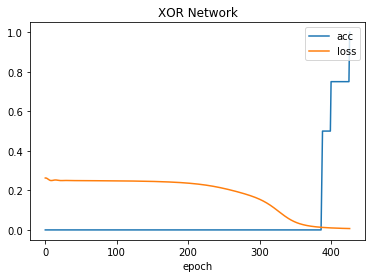

In [43]:
net.plot("all")